### **Análisis Exploratorio de Datos**

- Importamos las librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

- Leemos el archivo csv

In [2]:
df = pd.read_csv('migracion_origen_destino.csv')

- Observamos las primeras filas

In [3]:
df.head()

,Año,Pais,Id_Pais,Hombres_origen,Mujeres_origen,Hombres_destino,Mujeres_destino
0,2000.0,Burundi,BY,388445.0,370228.0,61094.0,64534.0
1,2000.0,Comoros,COM,36958.0,33544.0,6511.0,7288.0
2,2000.0,Djibouti,DJI,5201.0,3854.0,52920.0,47587.0
3,2000.0,Eritrea,ERI,255453.0,256053.0,6856.0,6096.0
4,2000.0,Ethiopia,ETH,239365.0,206521.0,322219.0,289165.0


- Rellenamos con 0 si es necesario.

In [4]:
df = df.fillna(0)

- Reemplazamos los valores * que puedan encontrarse en el nombre del país.

In [5]:
df['Pais'] = df['Pais'].str.replace('*', '')

- Observamos el final del dataframe.

In [6]:
df.tail()

,Año,Pais,Id_Pais,Hombres_origen,Mujeres_origen,Hombres_destino,Mujeres_destino
1170,2020.0,Samoa,WSM,66671.0,69061.0,2031.0,1990.0
1171,2020.0,Tokelau,TKL,1068.0,1044.0,586.0,652.0
1172,2020.0,Tonga,TON,36751.0,37799.0,2044.0,1698.0
1173,2020.0,Tuvalu,TUV,1816.0,1854.0,132.0,107.0
1174,2020.0,Wallis and Futuna Islands,WLF,5673.0,6244.0,1030.0,1010.0


- Composición del dataframe.

In [7]:
df.shape

(1175, 7)

- Tipos de datos del dataframe.

In [8]:
df.dtypes

Año                float64
Pais                object
Id_Pais             object
Hombres_origen     float64
Mujeres_origen     float64
Hombres_destino    float64
Mujeres_destino    float64
dtype: object

- Hacemos estadísticas descriptivas de las columnas numéricas.

In [9]:
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,Año,Hombres_origen,Mujeres_origen,Hombres_destino,Mujeres_destino
count,1175.00,1175.00,1175.00,1175.00,1175.00
mean,2010.00,466984.40,441100.47,487800.80,460383.73
std,7.07,959237.81,823166.84,1659210.19,1657425.67
min,2000.00,0.00,0.00,0.00,0.00
25%,2005.00,18089.50,18575.50,12547.00,11855.50
50%,2010.00,141216.00,152119.00,64380.00,64426.00
75%,2015.00,486190.50,475502.00,310897.50,294492.00
max,2020.00,11732041.00,6154881.00,24478996.00,26153840.00


- Verificamos la existencia de valores nulos

In [10]:
df.isnull().sum()

Año                0
Pais               0
Id_Pais            0
Hombres_origen     0
Mujeres_origen     0
Hombres_destino    0
Mujeres_destino    0
dtype: int64

- Eliminamos espacios innecesarios.

In [11]:
df['Pais'] = df['Pais'].str.strip()

- Hacemos un top 10 de los paises de origen más populares de emigración.

In [12]:
año = 2020
origen_año = df[df['Año'] == año].sort_values(by=['Mujeres_origen', 'Hombres_origen'], ascending=False)

top_origen_countries = origen_año.head(10)
top_origen_countries[['Pais', 'Mujeres_origen', 'Hombres_origen']]

,Pais,Mujeres_origen,Hombres_origen
1025,India,6137451.00,11732041.00
1056,Russian Federation,6101676.00,4655021.00
1003,China,5692658.00,4768512.00
1130,Mexico,5237864.00,5947873.00
1045,Syrian Arab Republic,3587239.00,4869975.00
1058,Ukraine,3360527.00,2778617.00
1017,Philippines,3289340.00,2804967.00
1146,Venezuela (Bolivarian Republic of),2810135.00,2605202.00
1022,Afghanistan,2627519.00,3226319.00
1053,Poland,2526101.00,2298995.00


- Hacemos un top 10 de los paises de destino más populares para los migrantes.

In [13]:
año = 2020
destino_año = df[df['Año'] == año].sort_values(by=['Mujeres_destino', 'Hombres_destino'], ascending=False)

top_destino_countries = destino_año.head(10)
top_destino_countries[['Pais', 'Mujeres_destino', 'Hombres_destino']]

,Pais,Mujeres_destino,Hombres_destino
1151,United States of America,26153840.00,24478996.00
1091,Germany,7870822.00,7891635.00
1056,Russian Federation,5924822.00,5712089.00
1071,United Kingdom,4895164.00,4464423.00
1090,France,4394139.00,4130737.00
1148,Canada,4220962.00,3828361.00
1043,Saudi Arabia,4219712.00,9235130.00
1152,Australia,3873673.00,3812187.00
1087,Spain,3569429.00,3272773.00
1079,Italy,3421084.00,2965914.00


### **Visualizaciones**

- Grafica de barras del top 10 paises de origen más populares.

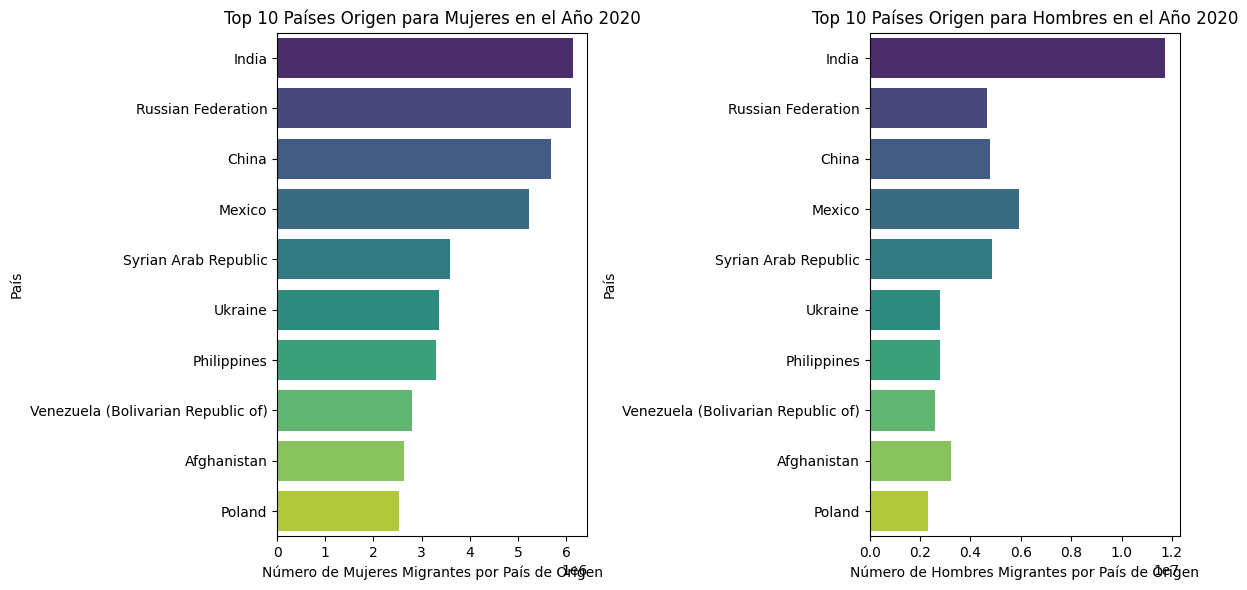

In [14]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=top_origen_countries, y='Pais', x='Mujeres_origen', palette='viridis')
plt.title("Top 10 Países Origen para Mujeres en el Año 2020")
plt.xlabel("Número de Mujeres Migrantes por País de Origen")
plt.ylabel("País")

plt.subplot(1, 2, 2)
sns.barplot(data=top_origen_countries, y='Pais', x='Hombres_origen', palette='viridis')
plt.title("Top 10 Países Origen para Hombres en el Año 2020")
plt.xlabel("Número de Hombres Migrantes por País de Origen")
plt.ylabel("País")

plt.tight_layout()
plt.show()

- Gráficos de líneas para mostrar el top 10 de los países destino más populares para los migrantes.

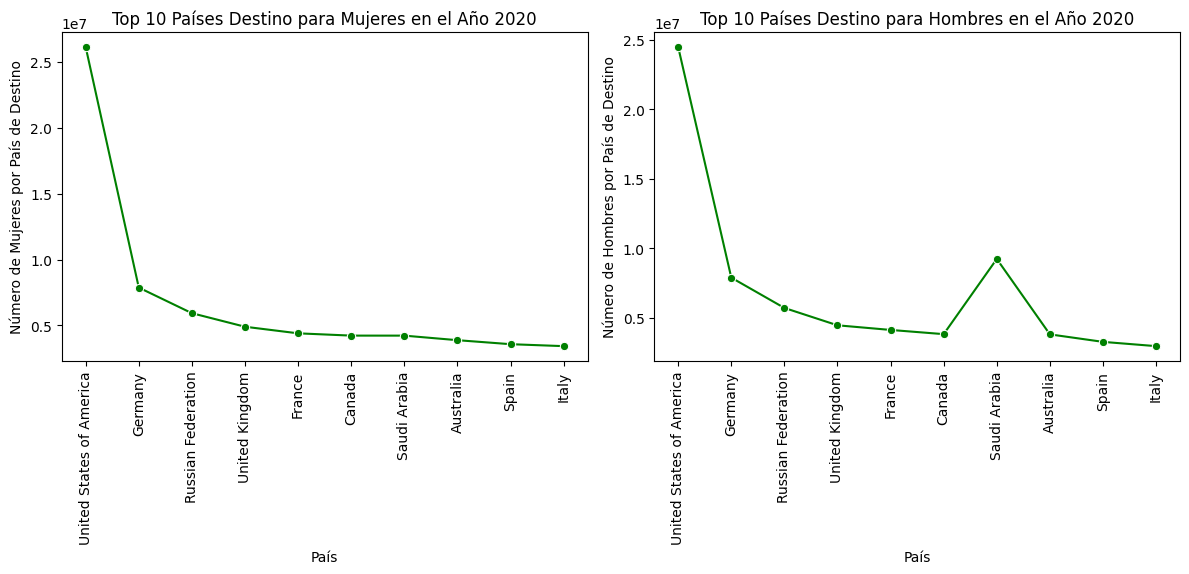

In [15]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.lineplot(data=top_destino_countries, y='Mujeres_destino', x='Pais', marker='o', color='green')
plt.title("Top 10 Países Destino para Mujeres en el Año 2020")
plt.xlabel("País")
plt.ylabel("Número de Mujeres por País de Destino")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.lineplot(data=top_destino_countries, y='Hombres_destino', x='Pais', marker='o', color='green')
plt.title("Top 10 Países Destino para Hombres en el Año 2020")
plt.xlabel("País")
plt.ylabel("Número de Hombres por País de Destino")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

- Mapas para mostrar la distribución de los migrantes según origen y destino.

C:\Users\Angie Arango\AppData\Local\Temp\ipykernel_21492\1075397667.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


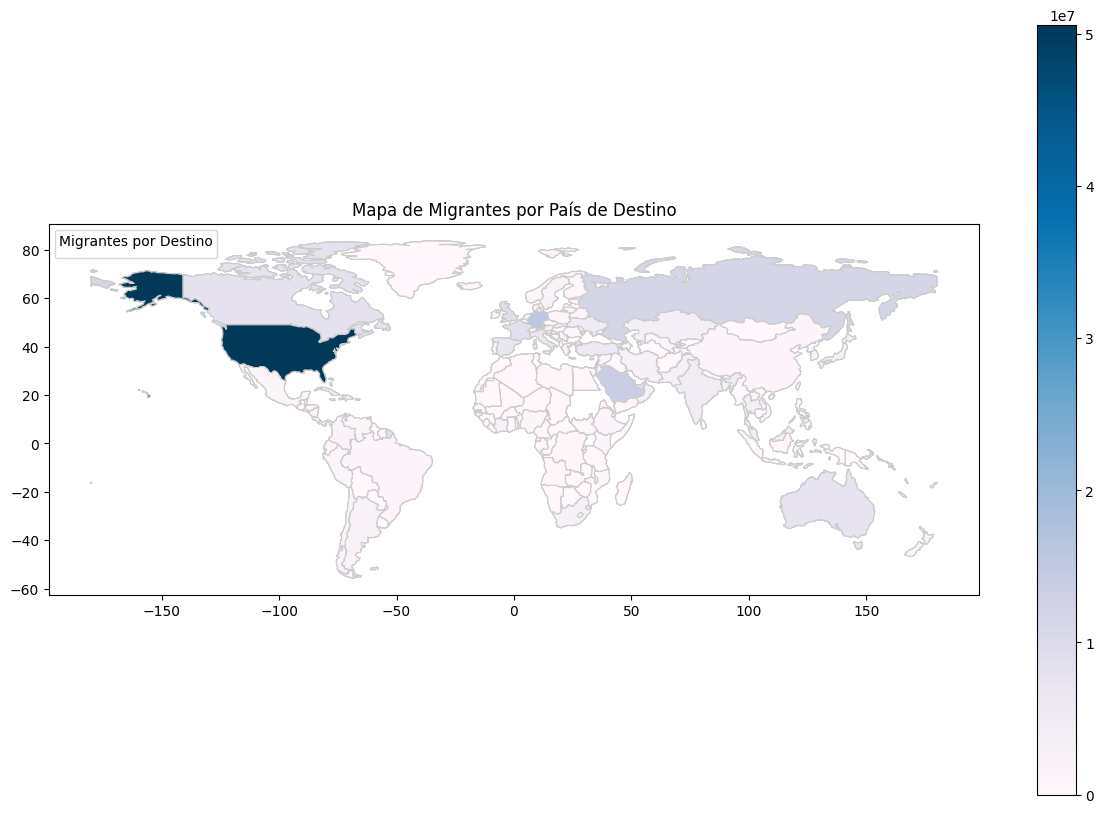

In [16]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
df['Total_destino'] = df['Mujeres_destino'] + df['Hombres_destino']
merged = world.merge(df, left_on='iso_a3', right_on='Id_Pais')
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='Total_destino', cmap='PuBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Mapa de Migrantes por País de Destino')
ax.legend(title='Migrantes por Destino', loc='upper left', fontsize=8)
plt.show()

- En el mapa de los países destino, los colores más oscuros demuestran los paises con mayor cantidad de inmigración, los colores más claros una menor cantidad.

C:\Users\Angie Arango\AppData\Local\Temp\ipykernel_21492\3223708523.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


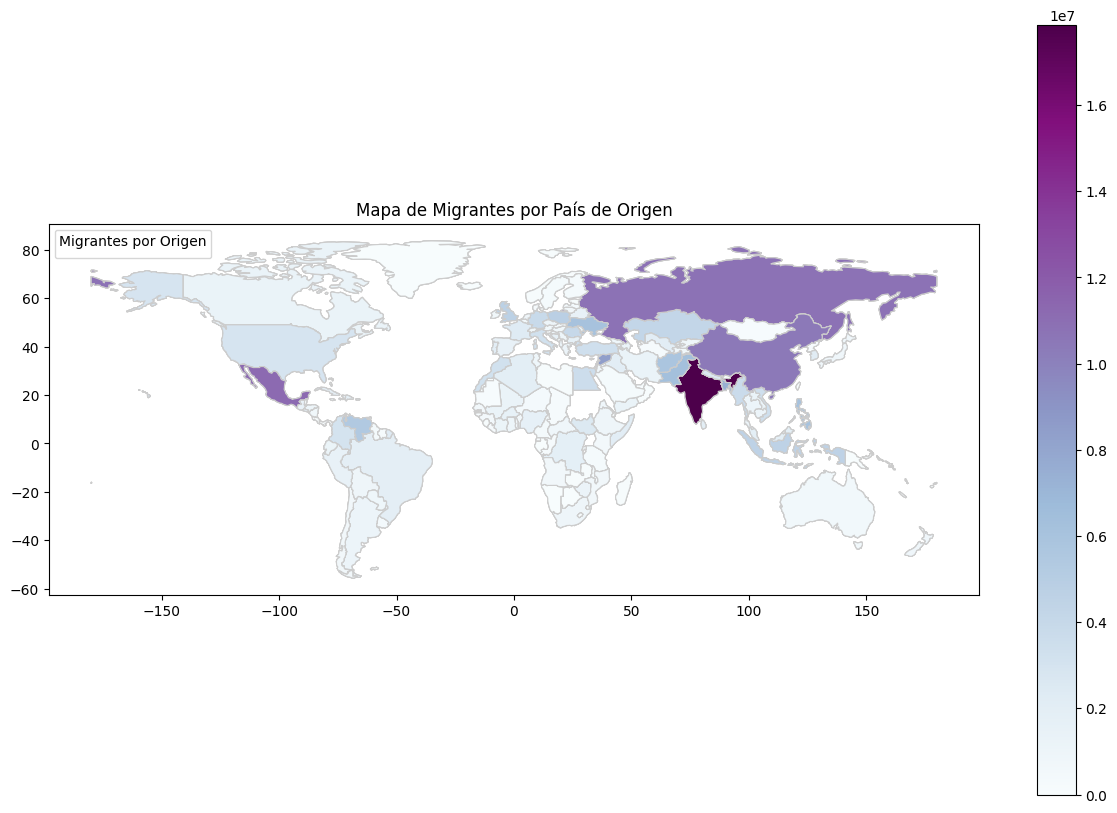

In [17]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
df['Total_origen'] = df['Mujeres_origen'] + df['Hombres_origen']
merged = world.merge(df, left_on='iso_a3', right_on='Id_Pais')
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='Total_origen', cmap='BuPu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Mapa de Migrantes por País de Origen')
ax.legend(title='Migrantes por Origen', loc='upper left', fontsize=8)

plt.show()

- En el mapa de los países origen, los colores más oscuros demuestran los paises con mayor cantidad de emigración, los colores más claros una menor cantidad.

### **Conclusión**

El análisis de los flujos migratorios revela la complejidad y diversidad de los desplazamientos de población, influenciados por una multitud de factores interconectados. Al considerar tanto a hombres como mujeres en estos movimientos, hemos observado un patrón recurrente de participación equitativa de ambos géneros en las migraciones.

Este enfoque nos ha permitido examinar detenidamente la evolución de la reubicación de hombres y mujeres en relación con los países de origen y destino. Estos hallazgos resaltan la importancia de comprender las dinámicas de género en el contexto de los movimientos poblacionales, ya que reflejan y, a su vez, influyen en la sociedad en su conjunto.

En particular, hemos identificado los países más populares de origen y destino para migrantes hombres y mujeres. Estos datos proporcionan información valiosa para entender cómo las migraciones están moldeando la diversidad cultural y económica en diferentes partes del mundo.